# 선긋기
- https://www.acmicpc.net/problem/2170

- 여러 번 그은 곳과 한 번 그은 곳의 차이를 구별할 수 없음
- 그려진 선들의 총 길이를 구하는 프로그램을 작성하시오
- 선이 여러 번 그려진 곳은 한 번씩만 계산한다

In [53]:
# N이 백만까지 주어지기 때문에 O(N) 또는 O(NlogN)의 시간복잡도를 보장해야 한다
n = int(input())

arr = [list(map(int, input().split())) for _ in range(n)]
arr.sort(key=lambda x:[x[0]]) # NlogN

ans = 0
# result = []
start, end = arr[0]
for a, b in arr:
    if a <= end and b > end:
        end = b
    elif a > end:
#         result.append([start, end])
        ans += end-start
        start, end = a, b
    
# result.append([start, end])
ans += end-start
print(ans)

4
1 3
2 5
3 5
6 7
5


# 좋다
- https://www.acmicpc.net/problem/1253

In [161]:
# n은 최대 2000개 -> 시간복잡도 O(N^2)까지 가능 (이중 for문)
# 숫자는 음수, 0, 정수 다 가능 100억까지

n개의 수 중에서 순서에 상관있게 서로 다른 수 2개를 선택하는 경우(순열)
- permutations은 $O(N!)$이기 때문에 시간초과 남
- 완전탐색(삼중for문)도 당연히 시간초과
- 두 용액이랑 똑같은 문제

- 투포인터($O(N)$)나 이진탐색($O(logN)$) 사용해야함
- 반례\
3 \
0 0 0
- 두 수의 합이 어떤 수와 같다하더라도 left 또는 right이 자기 자신을 포함하지 않게끔 해야됨
- left가 자기 자신과 같으면 left를 옮겨주고 left가 다르면 right을 옮겨줌

- 투포인터($O(N)$)나 이진탐색($O(logN)$) 사용해야함
- 반례\
3 \
0 0 0
- 두 수의 합이 어떤 수를 만들때 left 또는 right이 자기 자신을 포함하지 않게끔 해야됨
- left가 자기 자신과 같으면 left를 옮겨주고 left가 다르면 right을 옮겨줌

In [168]:
n = int(input())
nums = list(map(int, input().split()))

# 정렬
nums.sort()

cnt = 0
for i in range(n):
    num = nums[i]
    left = 0
    right = n-1
    while left < right:
        left_val = nums[left]
        right_val = nums[right]

        sum_val = left_val + right_val

        if sum_val == num:
            if left != i and right != i:
                print(f"{i}: {left_val} + {right_val} = {sum_val}")
                cnt += 1
                break
            else:
                if left == i:
                    left += 1
                else:
                    right -= 1
                    
        if sum_val < num:
            left += 1
        elif sum_val > num:
            right -= 1

        
print(cnt)

3
0 0 0
0: 0 + 0 = 0
1: 0 + 0 = 0
2: 0 + 0 = 0
3


# 이차원 배열과 연산
- https://www.acmicpc.net/problem/17140

- 3x3 배열 A
- R 연산: 배열 A의 모든 행에 대해서 정렬을 수행한다. 행의 개수 ≥ 열의 개수인 경우에 적용된다.
- C 연산: 배열 A의 모든 열에 대해서 정렬을 수행한다. 행의 개수 < 열의 개수인 경우에 적용된다.

In [3]:
# A[r][c]가 k가 될 때까지 while문 반복(while문은 100초)
    # 100초가 지나기 전에 k가 되면 break
    # 100초가 지나도 k가 안되면 -1
# 매 초마다 행, 열의 개수를 보고 R연산 또는 C연산 수행
# 행 또는 열이 100을 넘어가면 해당 행 또는 열의 100개를 제외하고 버림

r,c가 3차원 배열보다 더 크게 주어지는 경우를 생각 안해서 계속 오답처리됨 -> 반례 찾아보고 수정       
Transpose하려고 R연산과 C연산을 따로 만들어줬는데 그럴 필요 없이 **list(map(list, zip(*배열)))**을 사용하면 쉽게 Transpose할 수 있음   
- https://programmers.co.kr/learn/courses/4008/lessons/13318
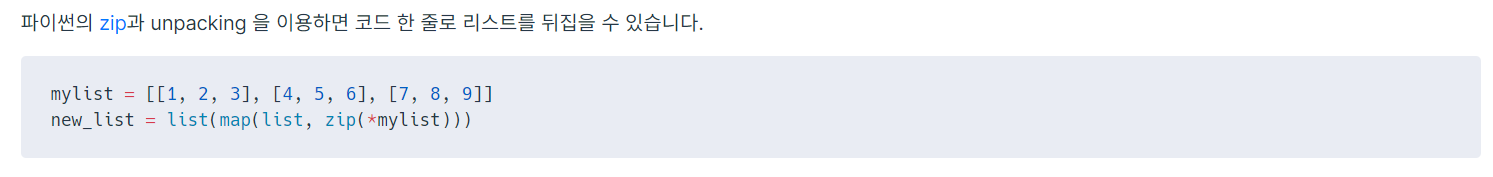

In [2]:
# import sys
# input = sys.stdin.readline
from collections import Counter

r, c, k = map(int, input().split())
arr = [list(map(int, input().split())) for _ in range(3)]

r = r - 1
c = c - 1

# 처음 행, 열의 개수
arr_r, arr_c = 3, 3


def shape(arr):
    arr_r, arr_c = 0, 0
    for i in range(len(arr)):
        arr_r += 1
    arr_c = len(arr[i])

    return arr_r, arr_c


# R연산
def sort_r(arr):
    new_arr = []
    max_row = 0
    for row in arr:
        count = {key: value for key, value in Counter(row).items() if key != 0}
        count = sorted(count.items(), key=lambda x: [x[1], x[0]])
        # 새로 추가할 행
        new_row = []
        # 수와 등장횟수
        for value, cnt in count:
            new_row.append(value)  # 수가 먼저
            new_row.append(cnt)
        new_arr.append(new_row)
        max_row = max(max_row, len(new_row))
    for i in new_arr:
        i.extend([0] * (max_row - len(i)))

    return new_arr


# C연산
def sort_c(arr):
    new_arr = []
    max_col = 0
    for i in range(arr_c):
        col = []
        for row in arr:
            col.append(row[i])
            count = {key: value for key, value in Counter(col).items() if key != 0}
            count = sorted(count.items(), key=lambda x: [x[1], x[0]])

        new_col = []

        for value, cnt in count:
            new_col.append(value)  # 수가 먼저
            new_col.append(cnt)
        max_col = max(max_col, len(new_col))
        new_arr.append(new_col)

    for i in new_arr:
        i.extend([0] * (max_col - len(i)))

    result_arr = []
    for i in range(max_col):
        tmp = []
        for j in range(len(new_arr)):
            tmp.append(new_arr[j][i])
        result_arr.append(tmp)

    return result_arr


time = 0
while True:
    if time > 100:
        print(-1)
        sys.exit(0)
    if arr_r - 1 >= r and arr_c - 1 >= c:
        # k가 되면 break
        if arr[r][c] == k:
            break

    # 행 또는 열의 크기가 100을 넘어가면 처음 100개를 제외한 나머지 버림
    if arr_r > 100:
        arr = arr[:][:100]
    elif arr_c > 100:
        tmp = [arr[i][:3] for i in range(len(arr))]
        arr = tmp

    # R연산 or C연산 선택
    if arr_r >= arr_c:
        arr = sort_r(arr)
    else:
        arr = sort_c(arr)

    time += 1
    arr_r, arr_c = shape(arr)

if r <= arr_r and c <= arr_c:
    if arr[r][c] == k:
        print(time)

1 2 4
1 2 1
2 1 3
3 3 3
52


클린 코드 출처: https://juhee-maeng.tistory.com/115

In [6]:
from collections import Counter
from functools import reduce
 
## R 연산
def R(array):
    mx = 0  # 가장 긴 리스트의 길이
    for i in range(len(array)):
        X = Counter(array[i])
        del X[0]  # 수를 정렬할 때, 0은 제외
        X = list(X.items())
        X.sort(key=lambda x: (x[1], x[0]))
        if len(X) > 50: X = X[:50]  # 크기가 100을 넘기면 안됨.
        array[i] = reduce(lambda x, y: list(x) + list(y), X[1:], list(X[0]))
        mx = max(mx, len(array[i]))
 
    ## 가장 긴 리스트에 맞춰, 0을 추가한다.
    for i in range(len(array)):
        if len(array[i]) < mx:
            array[i].extend([0] * (mx - len(array[i])))
 
 
def main():
    r, c, k = map(int, input().split())
    r, c = r - 1, c - 1
 
    board = [list(map(int, input().split())) for _ in range(3)]
    time = 0  # 시간
    if r < len(board) and c < len(board[0]):
        if board[r][c] == k: return time
 
    while True:
        if len(board) >= len(board[0]):  # 행의 개수 >= 열의 개수, R연산
            R(board)                     # R 연산
        else:                                     # 행의 개수 < 열의 개수, C연산
            board = list(map(list, zip(*board)))  # 트랜스포즈
            R(board)                              # R 연산
            board = list(map(list, zip(*board)))  # 트랜스포즈
        time += 1
        if time > 100: return -1
        if r < len(board) and c < len(board[0]):
            if board[r][c] == k: return time
 
print(main())

10 15 1
1 1 1
1 1 1
1 1 1
-1
